# Build Hückel model with custom parameters and user-defined basis set

## 0. Prerequisites

To set up jupyter-notebook, following packages has to be imported:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

Here we compute energy spectra of a group of atoms using tight-binding method - no periodic boundary conditions applied. As an example, we compute the compute energy spectrum for the benzene molecule in the framework of the Hückel model.
In order to start working with the package, one has to import it first:

In [2]:
import tb

## 1. Define a basis set

First, one needs to specify a basis sets for the each atom species used in computations. Although, there is an embeded library of basis functions for several atoms defined in the class `Atom()`, we show example of a custom user-defined basis set and custom empirical parameters without usage of the library.
First we create an `Atom()` object and add required number of orbitals to it. In our case, each atom has a single orbital with the orbital symmetry $p_z$.

In [3]:
a = tb.Atom('C')
a.add_orbital('pz', energy=-6.1, orbital=1, magnetic = 0)
tb.Atom.orbital_sets = {'C': a}

## 2. Add nearest-neighbours coupling parameters
When the basis set is determined, we have to specify the nearest-neighbour coupling:

In [4]:
tb.set_tb_params(PARAMS_C_C={'pp_pi': -2.9})

## 3. Specify geometry of the problem
The geomery of the problem may be described in several possible ways. One of them is passing the xyz-file determining positions if nodes/atoms into the constructor of the class `Hamiltonian()`.

In [5]:
xyz_file="""6
Benzene cell for the Huckel model


C1        0.00000        1.40272        0.00000
C2       -1.21479        0.70136        0.00000
C3       -1.21479       -0.70136        0.00000
C4        0.00000       -1.40272        0.00000
C5        1.21479       -0.70136        0.00000
C6        1.21479        0.70136        0.00000
"""

h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.41)

Note, that along with xyz-file, we have specified the parameter `nn_distance`. This parameter stands for the maximal possible distance between nearest neighbours. It is very imporant parameter since it determines the topology on the set of atoms. Making it larger may lead to including second-nearest neighbours etc.

## 4. Compute Hamiltonian matrix elements and show Hamiltonian matrix
The Hamiltonian matrix can be computed by the member function `initialize()` of the object `h`. The matrix is stored in the attribute `h_matrix` of the corresponding object.

/home/mk/TB_project/tb_env/lib/python2.7/site-packages/tb/diatomic_matrix_element.py:68: UserWarning: There is no parameter PARAMS_C_C[pp_sigma] in the dictionary
  bond + '[' + label + ']' + ' in the dictionary', UserWarning)


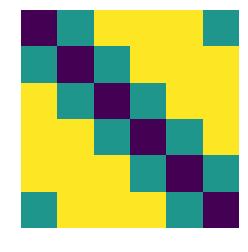

In [6]:
h.initialize()
plt.axis('off')
plt.imshow(np.real(h.h_matrix))

The warning message says that the programm tries to compute interatomic hoping matrix element for the $\sigma$-type diatomic symmetry between p-orbitals as well. Since we have not specify this parameter explicitelly it has been taken as zero by default. It has been made for purpose since we are interested only in $\pi$ orbitals.

Now everything is ready to compute energies and eigenvectors

## 5. Hamiltonian matrix diagonalization and visualization

In [7]:
E, V = h.diagonalize()
E = np.real(E)
ind = np.argsort(E)
E = E[ind]
V = V[:, ind]

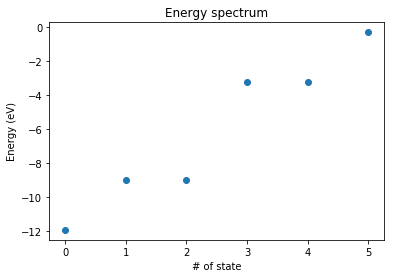

In [8]:
ax = plt.axes()
ax.set_title('Energy spectrum')
ax.set_xlabel('# of state')
ax.set_ylabel('Energy (eV)')
plt.scatter(range(len(E)), sorted(np.real(E)))
plt.show()

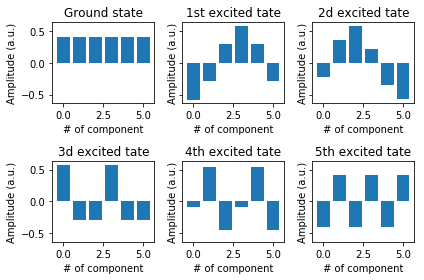

In [9]:
fig, ax = plt.subplots(2, 3, sharey='all')

ax[0, 0].set_title('Ground state')
ax[0, 0].set_xlabel('# of component')
ax[0, 0].set_ylabel('Amplitude (a.u.)')
ax[0, 0].bar(range(len(E)), (np.real(V[:, 0])))

ax[0, 1].set_title('1st excited tate')
ax[0, 1].set_xlabel('# of component')
ax[0, 1].set_ylabel('Amplitude (a.u.)')
ax[0, 1].bar(range(len(E)), (np.real(V[:, 1])))

ax[0, 2].set_title('2d excited tate')
ax[0, 2].set_xlabel('# of component')
ax[0, 2].set_ylabel('Amplitude (a.u.)')
ax[0, 2].bar(range(len(E)), (np.real(V[:, 2])))

ax[1, 0].set_title('3d excited tate')
ax[1, 0].set_xlabel('# of component')
ax[1, 0].set_ylabel('Amplitude (a.u.)')
ax[1, 0].bar(range(len(E)), (np.real(V[:, 3])))

ax[1, 1].set_title('4th excited tate')
ax[1, 1].set_xlabel('# of component')
ax[1, 1].set_ylabel('Amplitude (a.u.)')
ax[1, 1].bar(range(len(E)), (np.real(V[:, 4])))

ax[1, 2].set_title('5th excited tate')
ax[1, 2].set_xlabel('# of component')
ax[1, 2].set_ylabel('Amplitude (a.u.)')
ax[1, 2].bar(range(len(E)), (np.real(V[:, 5])))
fig.tight_layout()